In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm, LinearSegmentedColormap
from pathlib import Path

sys.path.append("..")

In [2]:
from manage_data import (get_conditions, load_result, delete_all, delete_result,
                         get_drag_by_velocity, get_std_by_velocity, get_log_scale)
from plot import get_colormap
from plot import log_fit, lin_log_fit, log_lin_fit, log_log_line, lin_fit

In [3]:
# delete_all()

In [29]:
particle: int | None = 1000
ensemble: int | None = 10000
sampling: int | None = 100
slope: float | None = None
Lambda: float | None = None
degree: int | None = 4
interval: int = 1000
tau = 1.0
Da = 1.0
T = 0.001

df = load_result(conditions=get_conditions(
    N_particle = particle,
    N_ensemble = ensemble,
    velocity = None,
    slope = slope,
    Lambda = Lambda,
    boundary = 5.0,
    N_bins = None,
    gamma = 1.0,
    temperature = T,
    tau = tau,
    Da = Da,
    delta_t = 0.001,
    initial = None,
    sampling = None,
    interval = interval,
    degree = degree,
    )
)

# df = df[(df["velocity"] >= 0.01) & (df["velocity"] <= 0.1)]
# df[(df["slope"] >= 0.3)]
df

,key,N_particle,N_ensemble,velocity,Lambda,boundary,N_bins,gamma,slope,temperature,tau,Da,delta_t,initial,sampling,interval,degree,drag,std,time
2103,abc487,1000,10000,0.001000,0.1,5.0,100,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,1000,4,0.6543,0.452082,61811.288968
2012,b5262d,1000,10000,0.001259,0.1,5.0,100,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,1000,4,0.8211,0.453427,61014.317519
1353,d4aedd,1000,10000,0.001585,0.1,5.0,100,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,1000,4,0.3951,0.452909,61016.978401
597,6fe608,1000,10000,0.001995,0.1,5.0,100,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,1000,4,0.8092,0.451682,61016.745135
450,0b54ea,1000,10000,0.002512,0.1,5.0,100,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,1000,4,0.4375,0.454565,61014.928579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1ab024,1000,10000,0.039810,0.5,5.0,100,1.0,0.5,0.001,1.0,1.0,0.001,10000,100,1000,4,1364.3897,2.714640,73646.008336
1470,4bc8bd,1000,10000,0.050120,0.5,5.0,100,1.0,0.5,0.001,1.0,1.0,0.001,10000,100,1000,4,1719.4409,2.719992,73186.820822
186,21901b,1000,10000,0.063100,0.5,5.0,100,1.0,0.5,0.001,1.0,1.0,0.001,10000,100,1000,4,2160.9909,2.691388,73196.850631
1478,ad5737,1000,10000,0.079430,0.5,5.0,100,1.0,0.5,0.001,1.0,1.0,0.001,10000,100,1000,4,2718.1280,2.682241,68193.538453


In [30]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['abc487', 'b5262d', 'd4aedd', '6fe608', '0b54ea', '1d7e50', '204d1c', '7674e2', '7e4d10', 'e92d39', '17ed48', '6630d0', 'ef2e87', '46b2bd', '099200', '36de72', '0c7497', 'abd3db', '718ae0', '0704ed', 'b2ff17', 'bb72c0', '2935ed', '5a6a0e', '56207b', '9b1705', '3886fb', 'ea2ee0', '57a89c', 'dd5f08', '9c6fa9', '81e89a', '33d199', 'c18c4c', 'b9b8e6', '7598c7', '26be45', 'a3f6bd', '130bb1', 'ba9aef', '148e2c', '3e4ce2', '9ab140', 'f57152', 'ed3896', 'a0b7ab', '69ae6b', '89fd08', '82f8cb', '2768a6', 'c49195', 'c56e53', 'ab4355', '4e5c5a', 'ef40dc', '0c598b', 'c96807', '2033bb', '9e57a4', 'df0194', 'fe96b0', 'ac1ea5', '71b245', 'c9f0ec', '28499a', 'c2f48d', 'ea2777', 'aa94c6', 'ff07b4', '2488dc', '9d2a20', 'b6020d', 'e51514', '1f817c', 'fe46e3', '181971', '79eea0', 'f08109', '8a0cca', '845c47', '659324', '6d0129', 'df6042', 'e153b4', '90b476', '961b4d', '445a02', '024b9d', '85f1fb', '2d56fe', '88f720', 'a57235', 'e45ee6', '5e5212', '4d3c69', '773332', '56ae4f', 'bb9f8a', 'fe871e', 'a35832',

In [31]:
available_slope, available_Lambda, available_velocity = sorted(
    set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
print(f"slope = {available_slope}")
print(f"Lambda = {available_Lambda}")

# available_velocity = np.array([0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0])
# available_velocity = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0])
print(f"velocity = {available_velocity}")

data = 5 x 5 x 21 = 525
slope = [0.1, 0.2, 0.3, 0.4, 0.5]
Lambda = [0.1, 0.2, 0.3, 0.4, 0.5]
velocity = [0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1]


In [32]:
drag, std = [], []

for velocity in available_velocity:
    drag.append(get_drag_by_velocity(df, velocity=velocity))
    std.append(get_std_by_velocity(df, velocity=velocity))

drag, std = np.array(drag), np.array(std)
print(drag.shape)

# nrows, ncols = 4, 4

# fig, axs = plt.subplots(nrows, ncols, figsize=(15,12))

# for i in range(nrows):
#     for j in range(ncols):
#         ax = axs[i,j]
#         ax.set_title(f"f = {available_slope[i]} Lambda = {available_Lambda[j]}", fontsize=25)
#         ax.set_xlabel("velocity", fontsize=20)
#         ax.set_ylabel("drag", fontsize=20)
#         ax.plot(available_velocity, drag[:,i,j])
#         ax.errorbar(available_velocity, drag[:,i,j], std[:,i,j], fmt='o', linewidth=2, capsize=6)
#         ax.axhline(0, linestyle="--", color="black")
#         ax.set_xscale("log")
#         # ax.set_xlim([0, 0.01])
#         # ax.set_ylim([None, 1e6])

# fig.tight_layout()
# # plt.savefig(f"fig/drag ptcl={particle} ensemble={ensemble} variable={len(available_Lambda)*len(available_slope)}.jpg")
# plt.show()

(21, 5, 5)


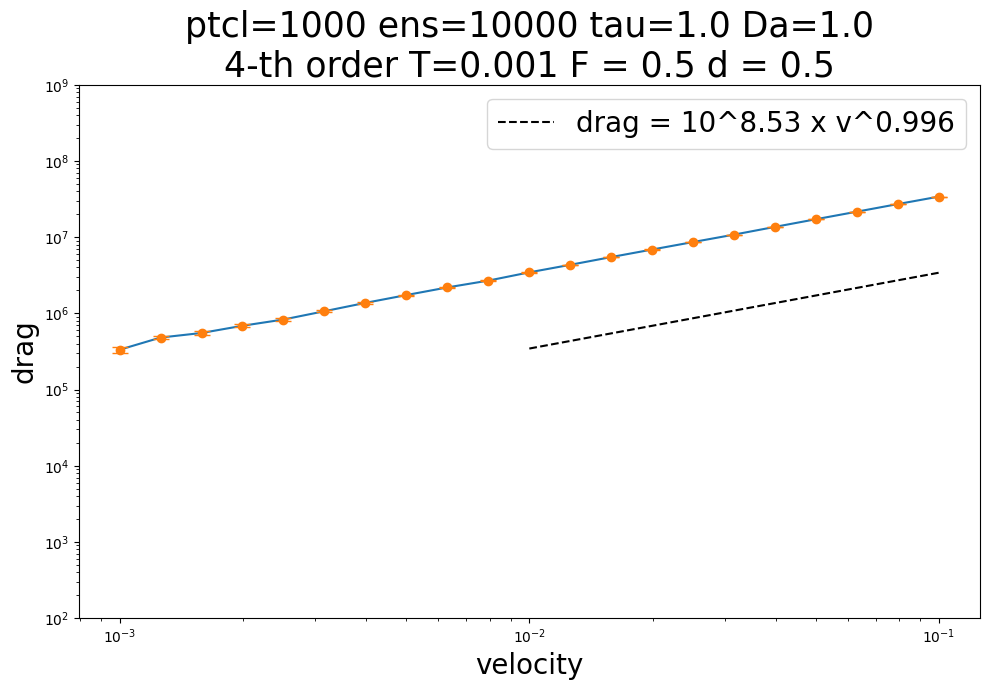

In [37]:

fig, ax = plt.subplots(figsize=(10,7))

f, d = 0.5, 0.5
i, j = available_slope.index(f), available_Lambda.index(d)

ax.set_title(f"ptcl={particle} ens={ensemble} tau={tau} Da={Da}\n{degree}-th order T={T} F = {available_slope[i]} d = {available_Lambda[j]}", fontsize=25)
ax.set_xlabel("velocity", fontsize=20)
ax.set_ylabel("drag", fontsize=20)
ax.plot(available_velocity, drag[:,i,j])
ax.errorbar(available_velocity, drag[:,i,j], std[:,i,j], fmt='o', linewidth=2, capsize=6)
ax.axhline(0, linestyle="--", color="black")
fit_x, fit_y, slope, intercept = log_fit(available_velocity, drag[:,i,j], 0.01, 0.1, 1.0)
ax.plot(fit_x, fit_y, "k--", label=fr"drag = 10^{intercept:.2f} x v^{slope:.3f}")
ax.set_xscale("log")
ax.set_yscale("log")
# ax.set_xlim([0, 0.01])
ax.set_ylim([1e2, 1e9])

ax.legend(fontsize=20)
fig.tight_layout()
Path(f"fig/{degree}/drag_by_velocity").mkdir(parents=True, exist_ok=True)
plt.savefig(f"fig/{degree}/drag_by_velocity/log scale ptcl={particle} ens={ensemble} f={f} d={d}.jpg")
plt.show()

In [ ]:
# # available_slope, available_Lambda, available_velocity = sorted(
# #     set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
# # print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
# # print(f"slope = {available_slope}")
# # print(f"Lambda = {available_Lambda}")

# available_slope = [0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0]
# available_Lambda = [0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0]

# # available_velocity = np.array([0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0, 1.259, 1.585, 1.995, 2.512, 3.162, 3.981, 5.012, 6.31, 7.943, 10.0])
# available_velocity = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0])
# # print(f"velocity = {available_velocity}")

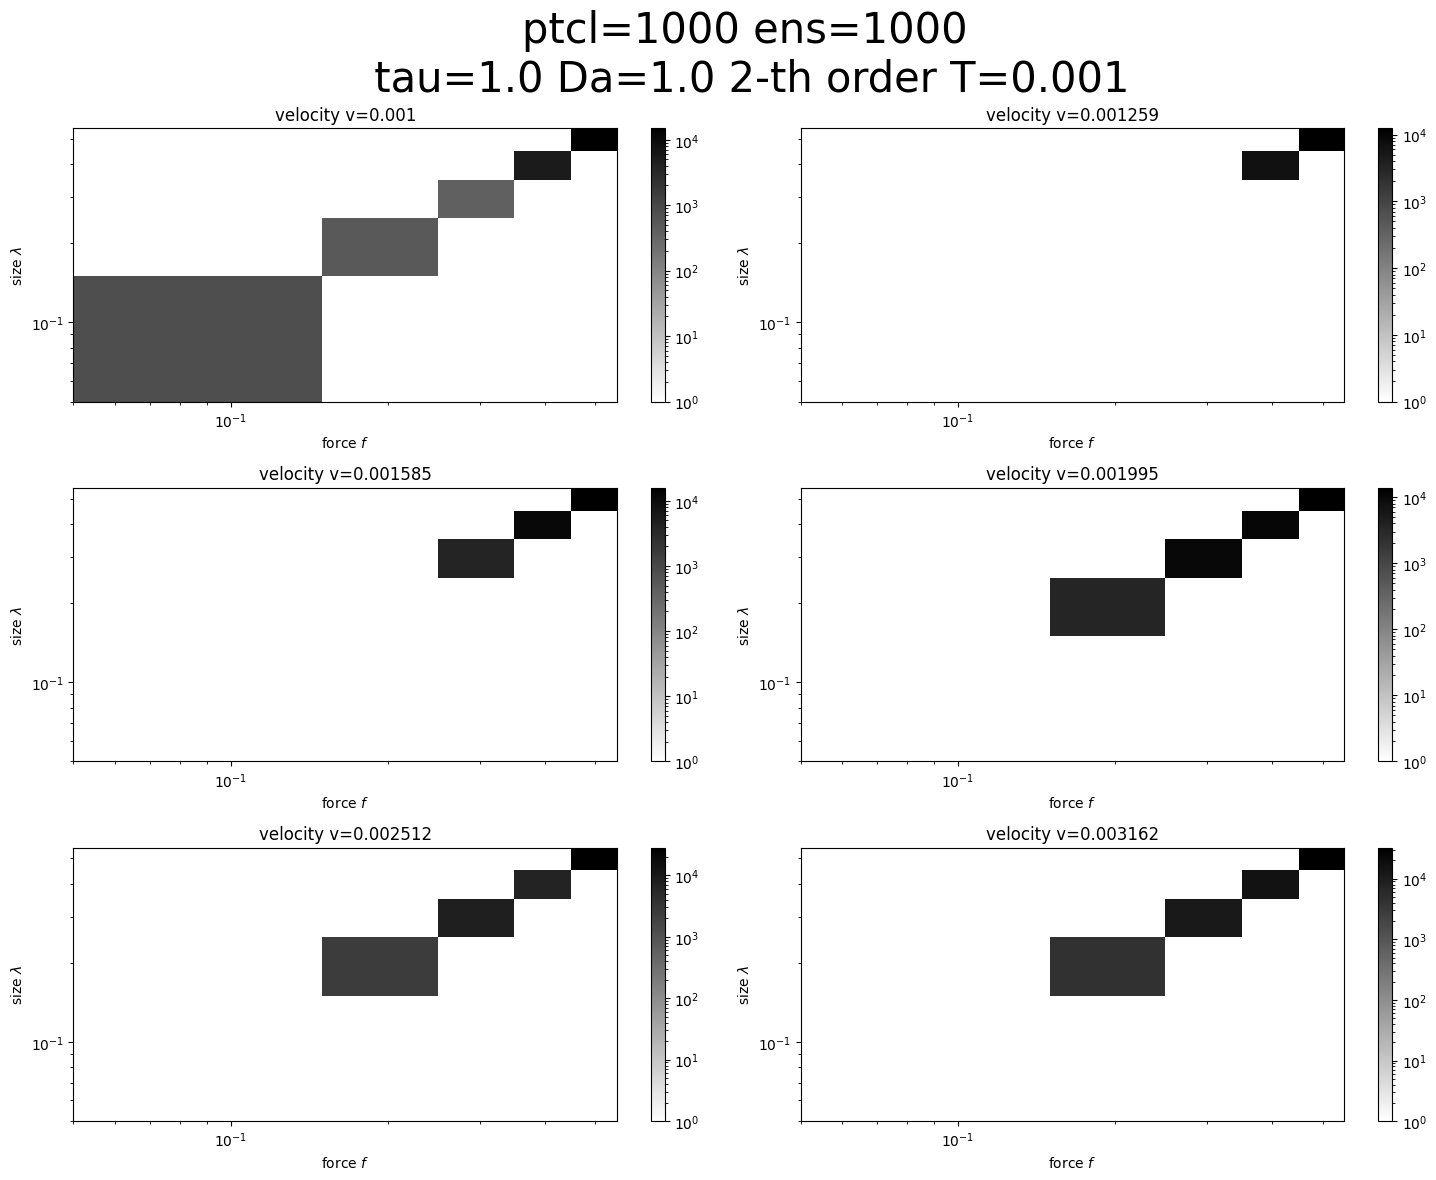

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15,12))
fig.suptitle(f"ptcl={particle} ens={ensemble}\n tau={tau} Da={Da} {degree}-th order T={T}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]
    
    drag = get_drag_by_velocity(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()
    # print(np.log10(drag.max()), np.log10(-drag.min()))

    c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
                    norm=LogNorm(vmin=1, vmax=max(1,drag.max())), cmap="binary")
    # c = ax.pcolor(x, y, average, shading="auto",
    #                norm=Normalize(vmin=average.min(), vmax=0.0), cmap="bone")

    ax.set_xscale("log")
    ax.set_yscale("log")
    # ax.set_xlim([0, 1])
    # ax.set_ylim([0, 1])

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")

    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/{degree}/drag/ptcl={particle} ens={ensemble} {degree}-th order T={T} tau={tau} Da={Da}")
plt.show()

/mnt/d/OneDrive - SNU/Research/Non-equilibrium/YongjooBaek/AOUP/manage_data.py:218: RuntimeWarning: invalid value encountered in divide
  pm_flag = drag/np.abs(drag)
/mnt/d/OneDrive - SNU/Research/Non-equilibrium/YongjooBaek/AOUP/manage_data.py:219: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(np.abs(drag))


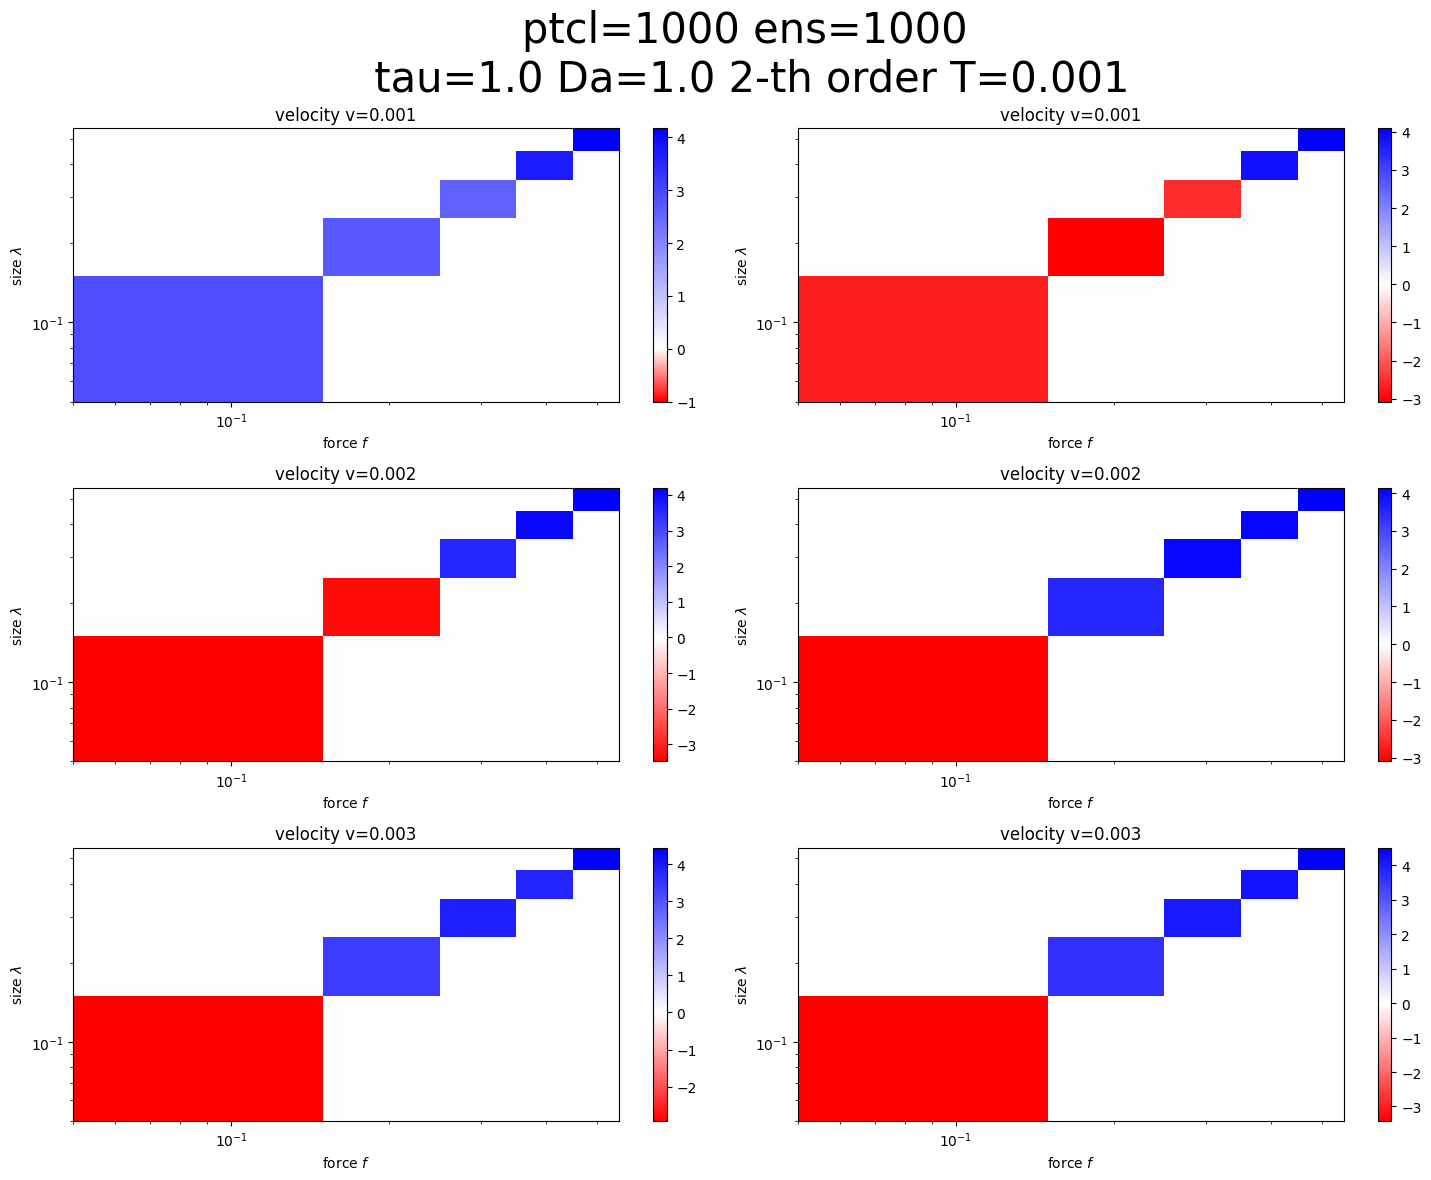

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15,12))
fig.suptitle(f"ptcl={particle} ens={ensemble}\n tau={tau} Da={Da} {degree}-th order T={T}", size=30)

dir_name = Path(f"./fig/{degree}/drag")
Path(dir_name).mkdir(parents=True, exist_ok=True)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]

    data = get_log_scale(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()

    cvals  = [min(data.min(), -1), 0, data.max()]
    colors = ["red","white","blue"]
    cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

    # c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
    c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
    
    # if i == 5: sys.exit()

    ax.set_title(f"velocity v={np.round(velocity, 3)}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    ax.set_xscale("log")
    ax.set_yscale("log")
    # ax.set_xlim([1.e-1, 1.e0])|
    # ax.set_ylim([1.e-1, 1.e0])
    
    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"{dir_name}/ptcl={particle} ens={ensemble} {degree}-th order T={T} tau={tau} Da={Da}.jpg")
plt.show()

/tmp/ipykernel_13945/1154347043.py:15: RuntimeWarning: invalid value encountered in divide
  Z = drag / std


ValueError: Format '0' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

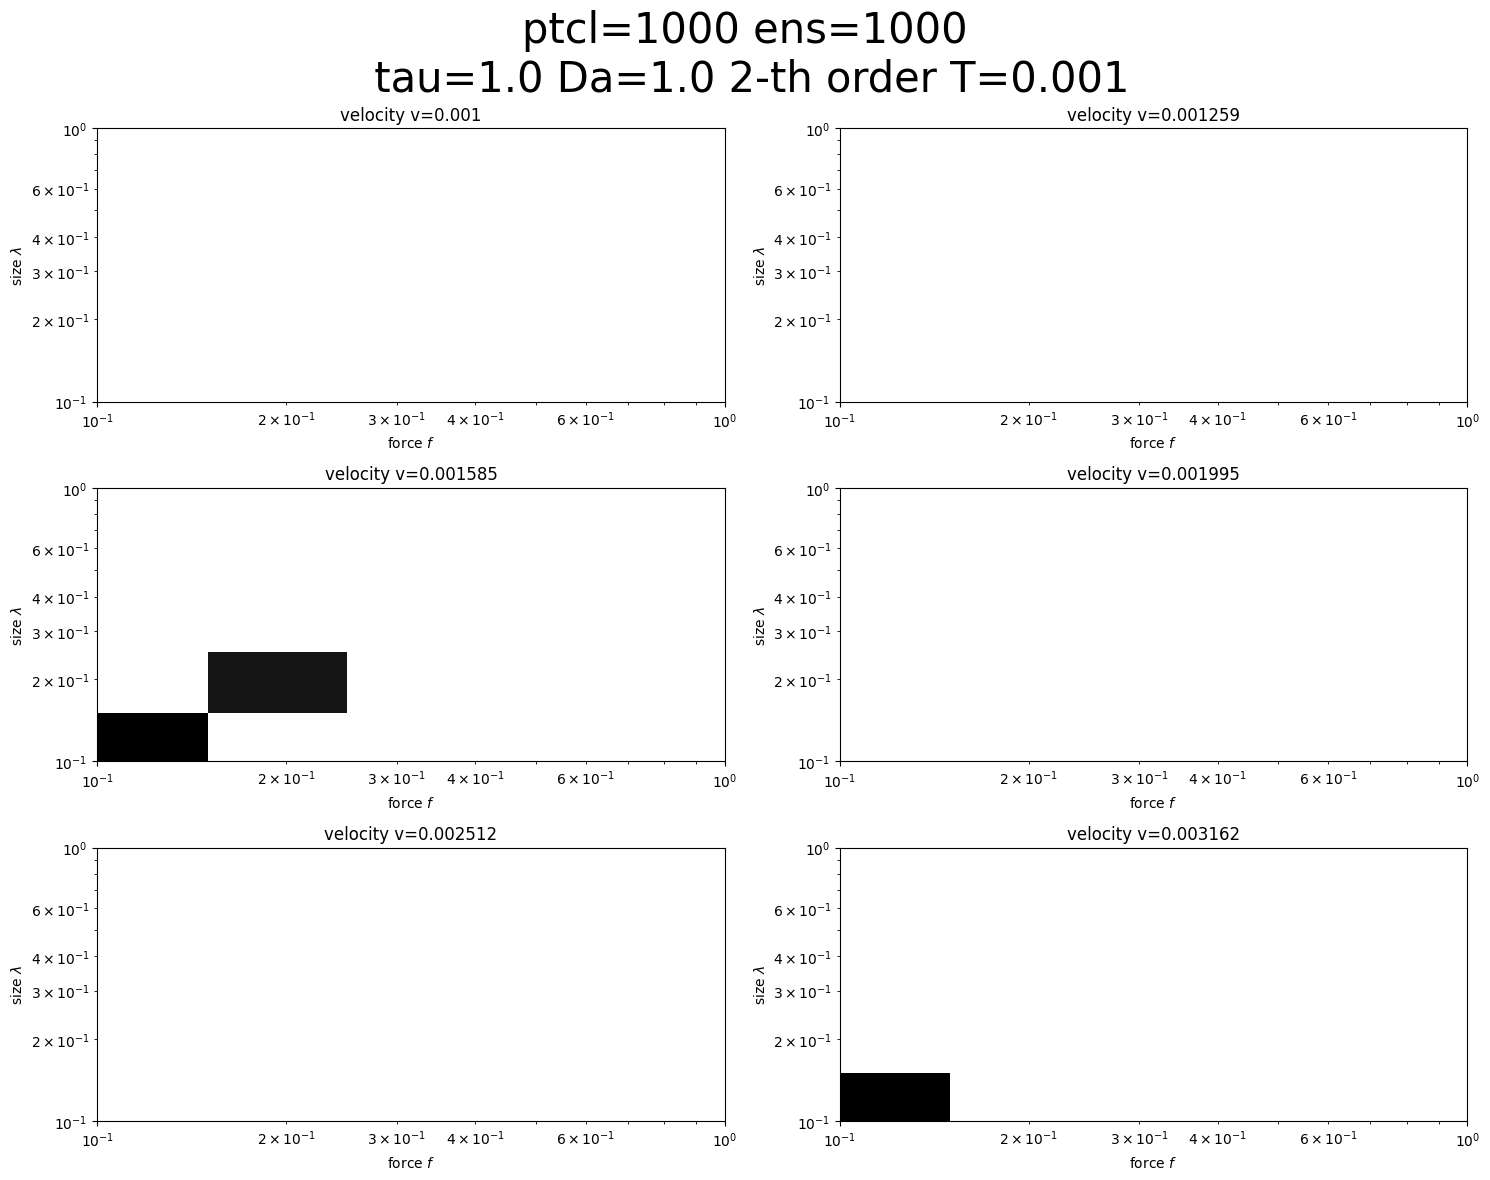

In [ ]:
import scipy.stats

fig, axs = plt.subplots(3, 2, figsize=(15,12))
fig.suptitle(f"ptcl={particle} ens={ensemble}\n tau={tau} Da={Da} {degree}-th order T={T}", size=30)

dir_name = Path(f"./fig/{degree}/test")
dir_name.mkdir(parents=True, exist_ok=True)

for i, ax in enumerate(axs.flat):
    velocity=available_velocity[i]

    drag = get_drag_by_velocity(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()
    std = get_std_by_velocity(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()

    Z = drag / std
    Z[np.isnan(Z)] = 0.0
    p_value = scipy.stats.norm.cdf(Z)
    # print(p_value.min())
    
    cvals  = [0.15, 0.16]
    colors = ["black","white"]
    cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

    c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
                      cmap=cmap, norm=norm)

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([1.e-1, 1.e0])
    ax.set_ylim([1.e-1, 1.e0])

    # cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"{dir_name}/ptcl={particle} ens={ensemble} {degree}-th order T={T} tau={tau} Da={Da}")
plt.show()

In [ ]:
# from scipy.stats import norm

# fig, axs = plt.subplots(3, 3, figsize=(15,12))
# fig.suptitle(f"Positive drag T-test P-value, ensemble={ensemble}", size=30)

# for i, ax in enumerate(axs.flat):
#     velocity=available_velocity[i]

#     drag = get_drag_by_velocity(df, velocity=velocity)
#     std = get_std_by_velocity(df, velocity=velocity)

#     Z = drag / std
#     Z[np.isnan(Z)] = 0.0

#     p_value = 1 - norm.cdf(Z)
#     # p_value[np.isnan(p_value)] = 1.e-10
#     # print(p_value)
#     # print(p_value.min())

#     # c = ax.contourf(available_slope, available_Lambda, p_value,
#     #             norm=LogNorm(vmin=p_value.min(), vmax=1), cmap="binary_r")
#     c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
#                 norm=LogNorm(vmin=1.e-15, vmax=1.e-2), cmap="binary_r")

#     ax.set_title(f"velocity v={velocity}")
#     ax.set_xlabel(rf"force $f$")
#     ax.set_ylabel(rf"size $\lambda$")
#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     ax.set_xlim([1.e-3, 1.e+1])
#     ax.set_ylim([1.e-3, 1])

#     cbar = plt.colorbar(c)

# fig.tight_layout()
# plt.savefig(f"./fig/Positive Drag T-Test P-value, ensemble={ensemble}.jpg")
# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# import matplotlib.colors

# X = np.linspace(0, 10, 100)
# Y = np.linspace(0, 10, 100)
# X, Y = np.meshgrid(X, Y)

# rng = np.random.default_rng()
# energy = 2 * rng.random([100,100,10]) - 1

# fig = plt.figure(figsize=(10,20))
# # ax = fig.add_subplot(projection='3d')
# ax = plt.axes([0, -1, 1, 2],projection='3d')
# norm = matplotlib.colors.Normalize(vmin=np.min(energy),vmax=np.max(energy))

# for n, z in enumerate(list(np.linspace(0,10,10))):
#     Z = np.zeros_like(X)+z
#     ax.plot_surface(X, Y, Z, facecolors = cm.coolwarm(norm(energy[:,:,n])));

# ax.set_box_aspect((1, 1, 4))

# plt.show()

In [ ]:
# fig, ax = plt.subplots()
# velocity = 1.0

# drag = get_drag_by_velocity(df, velocity=velocity)
# print(np.log10(drag.max()), np.log10(-drag.min()))

# cvals  = [1, drag.max()]
# colors = ["white", "black"]
# cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

# c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
#                   norm=norm, cmap=cmap)

# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim([1.e-3, 1.e+1])
# ax.set_ylim([1.e-3, 1])

# ax.set_title(f"AOUP drag, velocity={velocity}")
# ax.set_xlabel(rf"Force $f$")
# ax.set_ylabel(rf"Size $\lambda$")

# cbar = plt.colorbar(c)
# plt.show()

In [ ]:
# fig, ax = plt.subplots()

# data = get_log_scale(df, velocity=velocity)

# cvals  = [data.min(), 0, data.max()]
# colors = ["red","white","blue"]
# cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

# c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
# # c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)

# ax.set_title(f"AOUP drag, velocity={velocity} ensemble={ensemble}")
# ax.set_xlabel(rf"Force $f$")
# ax.set_ylabel(rf"Size $\lambda$")
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim([1.e-3, 1.e1])
# ax.set_ylim([1.e-3, 1])

# cbar = plt.colorbar(c)
# # plt.savefig(f"./fig/AOUP drag, velocity={velocity}, ensemble={ensemble}.jpg")
# plt.show()

In [ ]:
# drag = get_drag_by_velocity(df, velocity=velocity)
# std = get_std_by_velocity(df, velocity=velocity)

# Z = drag / std
# Z[np.isnan(Z)] = 0.0

# p_value = scipy.stats.norm.cdf(Z)
# # print(p_value)
# print(p_value.min())

# fig, ax = plt.subplots()

# cvals = [1.e-4, 1]
# colors = ["black", "white"]
# cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

# # c = ax.contourf(available_slope, available_Lambda, p_value, shading='auto',
# #                norm=norm, cmap=cmap)
# c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
#                norm=norm, cmap=cmap)

# ax.set_title(f"T-Test p-value, velocity={velocity} ensemble={ensemble}")
# ax.set_xlabel(rf"Force $f$")
# ax.set_ylabel(rf"Size $\lambda$")
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim([1.e-3, 1.e+1])
# ax.set_ylim([1.e-3, 1])

# cbar = plt.colorbar(c)
# # plt.savefig(f"./fig/T-Test p-value, velocity={velocity}, ensemble={ensemble}.jpg")
# plt.show()